In [3]:
import sys, os
sys.path.append(os.path.abspath('../'))

from os import listdir
import pandas as pd
import numpy as np
from utils import find_csv_filenames
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

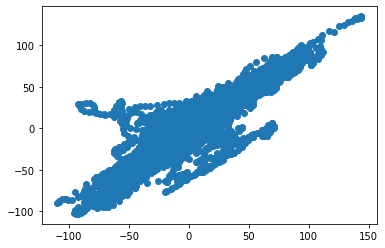

In [4]:
subject_filenames = find_csv_filenames("../../dataset")
name = subject_filenames[0]
df = pd.read_csv(name)

plt.scatter(x=df['F3'], y=df['FC5'])

In [21]:
for i in range(df.shape[1]):
    df.iloc[:, i] = df.iloc[:, i] - df.iloc[:, i].mean()

cov = np.dot(df.T.to_numpy(), df.to_numpy())
print(cov)

[[ 4.26666560e+05  4.38646950e+04  3.39977889e+04  2.17344268e+04
   5.44173425e+04  3.06264665e+04  2.13715752e+04 -1.64230804e+03
   5.26070099e+04  3.18417193e+04  1.10272574e+04  2.13024741e+04
  -1.92699669e+03  2.38604849e+04  2.06302871e+04  1.45164945e+04
   1.97503789e+04  2.28510544e-11 -4.62563321e-12]
 [ 4.38646950e+04  2.57961207e+07  2.02435920e+07  1.61039105e+07
   2.27515868e+07  1.76735569e+07  1.46464983e+07  7.37603025e+06
   2.27211246e+07  1.73243093e+07  1.03745832e+07  1.27035636e+07
   7.34074548e+06  1.39974284e+07  1.23589811e+07  1.02264162e+07
   5.63451935e+06 -1.07128779e+04  7.74495208e+03]
 [ 3.39977889e+04  2.02435920e+07  1.86520659e+07  1.56219532e+07
   1.73322689e+07  1.55147199e+07  1.43251304e+07  7.80502277e+06
   1.72980235e+07  1.49741146e+07  1.03420449e+07  1.19631867e+07
   7.76617871e+06  1.04799510e+07  1.06076543e+07  9.55895961e+06
   5.44821658e+06 -1.48637857e+04  6.84404497e+03]
 [ 2.17344268e+04  1.61039105e+07  1.56219532e+07  1.62

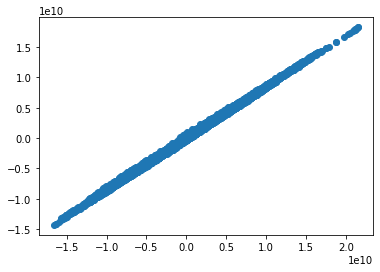

In [40]:
trans_data = pd.DataFrame(np.dot(cov, df.T)).T

plt.scatter(x=trans_data.iloc[:, 1], y=trans_data.iloc[:, 2])

In [52]:
pca = PCA(n_components=5)
reduct_data = pca.fit_transform(df)

print(reduct_data.shape)

(80000, 5)


In [9]:
split_data = df.iloc[:100, :10]
u, s, v = np.linalg.svd(split_data)

In [10]:
print(u.shape)
print(s.shape)
print(v.shape)

(100, 100)
(10,)
(10, 10)
